In [2]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

Image Preprocess

In [3]:
images_path = 'C:\\Users\\CSE499\\Desktop\\model_train02\\Flickr_Data\\Images\\'
images = glob(images_path+'*.jpg')
len(images)

8084

In [4]:
images[:5]

['C:\\Users\\CSE499\\Desktop\\model_train02\\Flickr_Data\\Images\\1012212859_01547e3f17.jpg',
 'C:\\Users\\CSE499\\Desktop\\model_train02\\Flickr_Data\\Images\\1015118661_980735411b.jpg',
 'C:\\Users\\CSE499\\Desktop\\model_train02\\Flickr_Data\\Images\\1015584366_dfcec3c85a.jpg',
 'C:\\Users\\CSE499\\Desktop\\model_train02\\Flickr_Data\\Images\\101654506_8eb26cfb60.jpg',
 'C:\\Users\\CSE499\\Desktop\\model_train02\\Flickr_Data\\Images\\101669240_b2d3e7f17b.jpg']

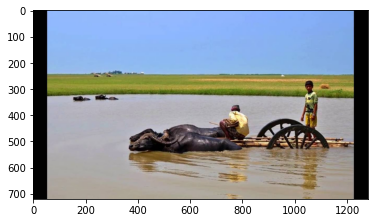

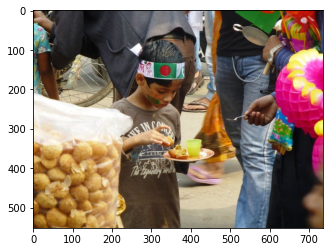

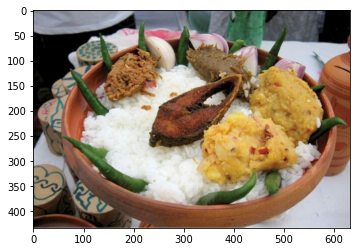

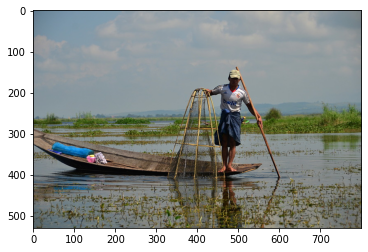

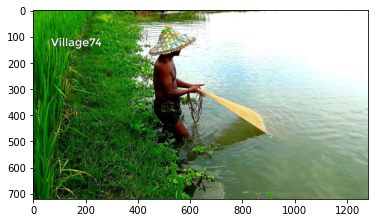

In [5]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [6]:
from keras.applications.resnet import ResNet50

incept_model = ResNet50(include_top=True)

In [7]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [8]:
images[0].split('\\')[-1]

'1012212859_01547e3f17.jpg'

In [9]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('\\')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


In [10]:
images_features

{'1012212859_01547e3f17.jpg': array([0.8536753 , 0.        , 1.6244547 , ..., 0.51034313, 0.07147279,
        0.04827396], dtype=float32),
 '1015118661_980735411b.jpg': array([0.49013188, 5.12504   , 0.47734857, ..., 0.13373324, 0.27439934,
        1.0451115 ], dtype=float32),
 '1015584366_dfcec3c85a.jpg': array([2.2588031 , 0.73448646, 1.7291149 , ..., 0.19028637, 0.45598072,
        0.4967737 ], dtype=float32),
 '101654506_8eb26cfb60.jpg': array([0.04269487, 0.14559335, 0.45987117, ..., 0.3054264 , 0.17850259,
        0.16137402], dtype=float32),
 '101669240_b2d3e7f17b.jpg': array([2.8230157 , 0.59771395, 0.63696826, ..., 1.9023107 , 1.245734  ,
        0.00909025], dtype=float32),
 '1016887272_03199f49c4.jpg': array([0.4526549 , 0.14744306, 0.22484028, ..., 0.03965621, 0.14932513,
        0.0950618 ], dtype=float32),
 '1019077836_6fc9b15408.jpg': array([0.52633107, 0.5675196 , 0.3714573 , ..., 0.10625439, 0.47069445,
        0.51441336], dtype=float32),
 '1019604187_d087bf9a5f.jpg':

In [11]:
len(images_features)

1500

Text Preprocess

In [12]:
caption_path = 'C:\\Users\\CSE499\\Desktop\\model_train02\\Flickr_Data\\Flickr_TextData\\Flickr8k.token.txt'

In [13]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [14]:
captions

['1000268201_693b08cb0e.jpg#0\tThis is lalbagh fort.',
 '1000268201_693b08cb0e.jpg#1\tThis is lalbagh fort view.',
 '1000268201_693b08cb0e.jpg#2\tThis is lalbagh fort building.',
 '1000268201_693b08cb0e.jpg#3\tA day view of lalbagh fort.',
 '1000268201_693b08cb0e.jpg#4\tHistorical place in bangladesh- The Lalnagh Fort.',
 '1001773457_577c3a7d70.jpg#0\tThis is Shaheed Minar.',
 '1001773457_577c3a7d70.jpg#1\tThis is shaheed Minar front view.',
 "1001773457_577c3a7d70.jpg#2\tThis is Shaheed Minar's structure.",
 '1001773457_577c3a7d70.jpg#3\tA day view of Shaheed Minar.',
 '1001773457_577c3a7d70.jpg#4\tHistorical place in bangladesh- The Shaheed Minar.',
 '1002674143_1b742ab4b8.jpg#0\tThis is Libaration War museum.',
 '1002674143_1b742ab4b8.jpg#1\tThis is liberation War museum view.',
 '1002674143_1b742ab4b8.jpg#2\tThis is the front view of liberation War museum. ',
 '1002674143_1b742ab4b8.jpg#3\tThis is Liberation War museum building.',
 '1002674143_1b742ab4b8.jpg#4\tHistorical place in 

In [15]:
captions[0].split('\t')[0][:-2]

'1000268201_693b08cb0e.jpg'

In [16]:
len(captions)

40461

In [17]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [18]:
captions_dict

{'1012212859_01547e3f17.jpg': ['bangladeshi boy and a man taking their cow for bath',
  'boy and a man taking their cow for bath',
  'bangladeshi boy and a man taking their cow for bath after work .',
  'bangladeshi boy and a man taking their cow for bath at a pond.',
  'bangladeshi boy and a man taking their cow for bath .'],
 '1015118661_980735411b.jpg': ['Bangladeshi boy having street food called fushka in local wearing bangladeshi head band .',
  'Bangladeshi boy having street food called fushka in local .',
  'Bangladeshi boy having street food called fushka in local .',
  'Bangladeshi boy having street food called fushka in local .',
  'Bangladeshi boy having street food called fushka in local .'],
 '1015584366_dfcec3c85a.jpg': ['bangladeshi cultural food of elish fish and rice with bhorta .',
  'bangladeshi cultural food of elish fish and rice .',
  'bangladeshi cultural food of elish fish and rice .',
  'bangladeshi cultural food of elish fish and rice .',
  'bangladeshi cultur

In [19]:
len(captions_dict)

1500

Visualize Images with captions

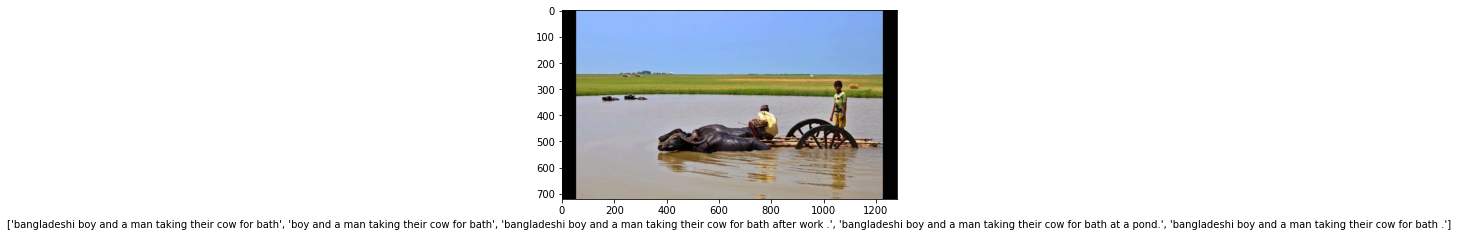

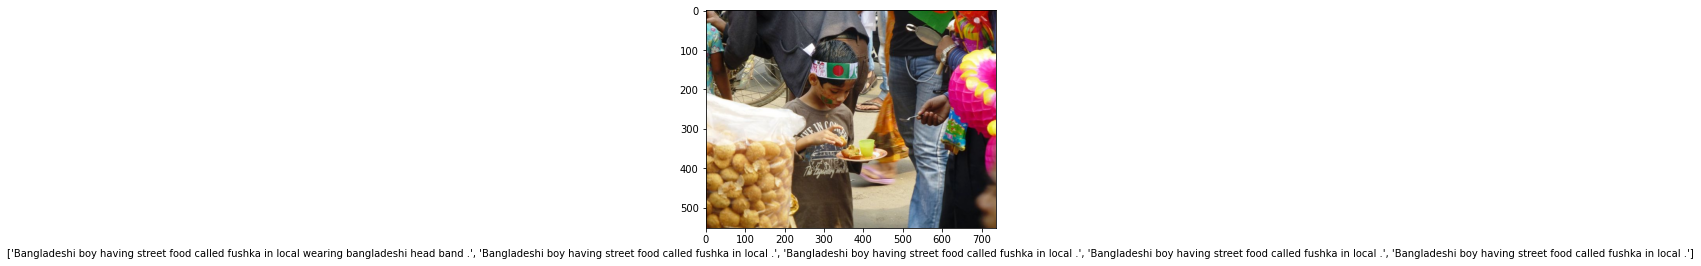

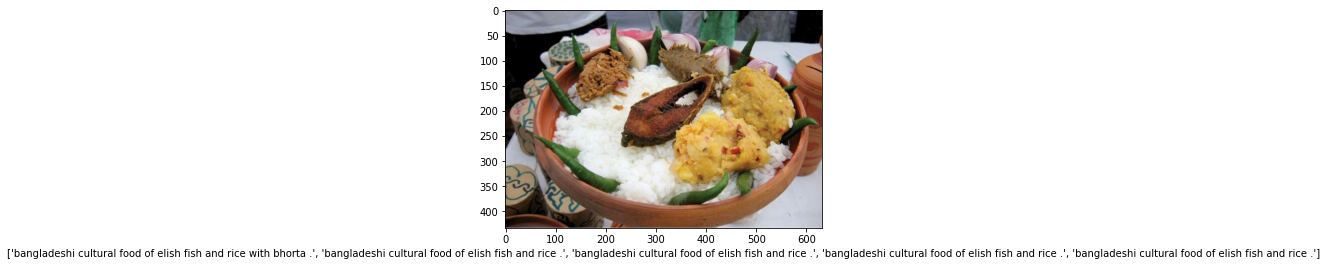

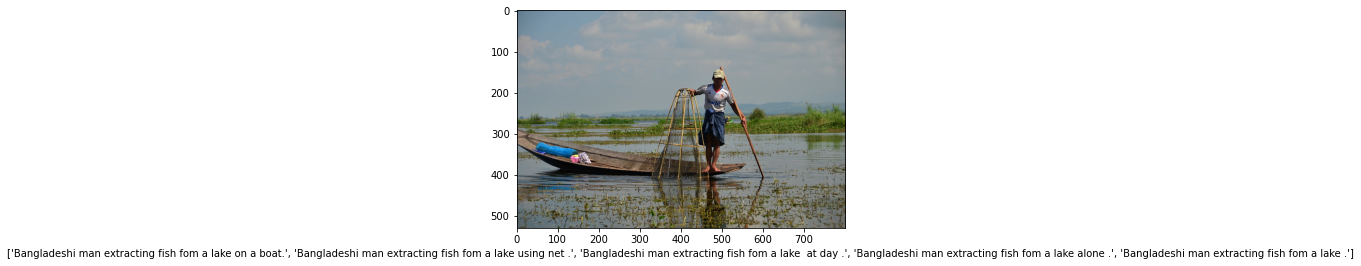

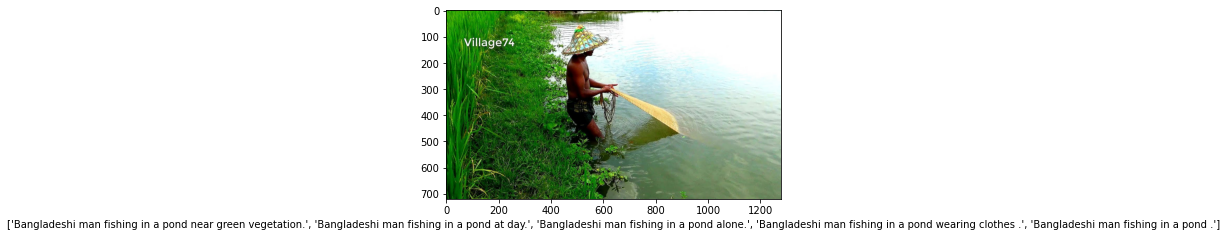

In [20]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split("\\")[-1]])
    
    plt.imshow(img)

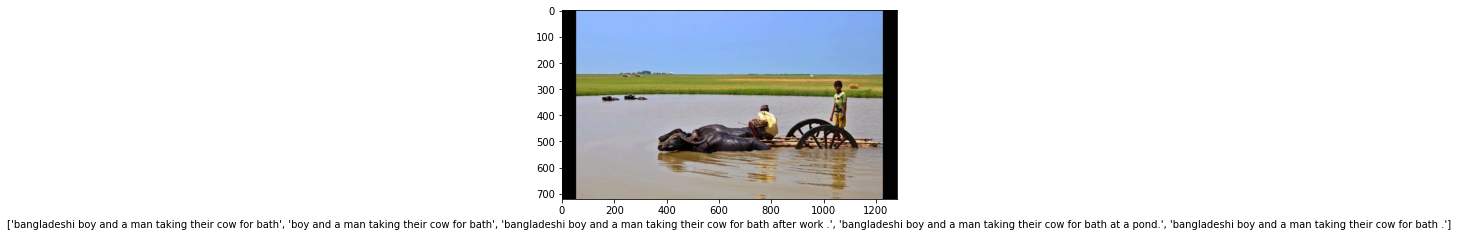

In [22]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    
    img_name = 'C:\\Users\CSE499\\Desktop\\model_train02\\Flickr_Data\\Images\\' + k
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('\\')[-1]])
    plt.imshow(img)
    
    break

In [23]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [24]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

Create Vocabulary

In [25]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [26]:
len(count_words)

4076

In [27]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [28]:
len(new_dict)

4076

In [29]:
new_dict['<OUT>'] = len(new_dict)

In [30]:
captions_backup = captions_dict.copy()

In [31]:
captions_dict = captions_backup.copy()

In [32]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [33]:
captions_dict

{'1012212859_01547e3f17.jpg': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 12],
  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 16, 5, 17, 12],
  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 12]],
 '1015118661_980735411b.jpg': [[1,
   2,
   3,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   2,
   26,
   27,
   15,
   12],
  [1, 2, 3, 18, 19, 20, 21, 22, 23, 24, 15, 12],
  [1, 2, 3, 18, 19, 20, 21, 22, 23, 24, 15, 12],
  [1, 2, 3, 18, 19, 20, 21, 22, 23, 24, 15, 12],
  [1, 2, 3, 18, 19, 20, 21, 22, 23, 24, 15, 12]],
 '1015584366_dfcec3c85a.jpg': [[1,
   2,
   28,
   20,
   29,
   30,
   31,
   4,
   32,
   33,
   34,
   15,
   12],
  [1, 2, 28, 20, 29, 30, 31, 4, 32, 15, 12],
  [1, 2, 28, 20, 29, 30, 31, 4, 32, 15, 12],
  [1, 2, 28, 20, 29, 30, 31, 4, 32, 15, 12],
  [1, 2, 28, 20, 29, 30, 31, 4, 32, 15, 12]],
 '101654506_8eb26cfb60.jpg': [[1, 2, 6, 35, 31, 36, 5, 37, 38, 5, 39, 12],
  [1, 2, 6, 35, 31, 36

Build Generator Function

In [34]:
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [35]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 12]
[1, 2, 3, 18, 19, 20, 21, 22, 23, 24, 25, 2, 26, 27, 15, 12]
[1, 2, 59, 4, 60, 23, 61, 29, 62, 42, 63, 64, 16, 42, 65, 15, 12]
[1, 2, 67, 59, 4, 60, 23, 61, 29, 62, 42, 63, 64, 25, 68, 51, 15, 12]
[1, 5, 6, 25, 144, 145, 124, 23, 94, 146, 147, 33, 5, 148, 29, 149, 23, 151, 153, 15, 12]
[1, 159, 289, 171, 217, 33, 5, 290, 4, 291, 292, 171, 293, 23, 137, 288, 23, 125, 29, 5, 294, 15, 12]
[1, 5, 6, 415, 38, 5, 416, 23, 5, 411, 236, 237, 5, 334, 417, 4, 5, 290, 418, 33, 163, 419, 367, 15, 12]
[1, 5, 6, 23, 288, 469, 5, 321, 3, 157, 23, 94, 440, 4, 499, 10, 498, 106, 500, 333, 501, 502, 503, 400, 498, 15, 12]
[1, 94, 322, 23, 94, 586, 493, 587, 127, 117, 118, 106, 159, 326, 97, 588, 217, 127, 25, 5, 336, 589, 4, 94, 347, 127, 590, 591, 15, 12]
[1, 536, 160, 130, 326, 97, 171, 217, 462, 891, 56, 5, 892, 893, 171, 217, 33, 26, 894, 869, 4, 822, 23, 318, 788, 171, 4, 217, 33, 895, 313, 15, 12]
[1, 5, 32

In [36]:
MAX_LEN

37

In [37]:
captions_dict

{'1012212859_01547e3f17.jpg': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 12],
  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 16, 5, 17, 12],
  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 12]],
 '1015118661_980735411b.jpg': [[1,
   2,
   3,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   2,
   26,
   27,
   15,
   12],
  [1, 2, 3, 18, 19, 20, 21, 22, 23, 24, 15, 12],
  [1, 2, 3, 18, 19, 20, 21, 22, 23, 24, 15, 12],
  [1, 2, 3, 18, 19, 20, 21, 22, 23, 24, 15, 12],
  [1, 2, 3, 18, 19, 20, 21, 22, 23, 24, 15, 12]],
 '1015584366_dfcec3c85a.jpg': [[1,
   2,
   28,
   20,
   29,
   30,
   31,
   4,
   32,
   33,
   34,
   15,
   12],
  [1, 2, 28, 20, 29, 30, 31, 4, 32, 15, 12],
  [1, 2, 28, 20, 29, 30, 31, 4, 32, 15, 12],
  [1, 2, 28, 20, 29, 30, 31, 4, 32, 15, 12],
  [1, 2, 28, 20, 29, 30, 31, 4, 32, 15, 12]],
 '101654506_8eb26cfb60.jpg': [[1, 2, 6, 35, 31, 36, 5, 37, 38, 5, 39, 12],
  [1, 2, 6, 35, 31, 36

In [38]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

In [39]:
X, y_in, y_out = generator(images_features, captions_dict)

In [40]:
len(X), len(y_in), len(y_out)

(96139, 96139, 96139)

In [41]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [42]:
X.shape, y_in.shape, y_out.shape

((96139, 2048), (96139, 37), (96139, 4077))

In [43]:
X[1510]

array([2.1919458 , 0.56390804, 0.03549831, ..., 0.15797992, 0.01620382,
       0.13099398], dtype=float32)

In [44]:
y_in[2]

array([1., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

Model

In [45]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [46]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 37, 128)          0         
 )                                                               
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 37, 128)           521856    
                                                                 
 lstm (LSTM)                 (None, 37, 256)           394240    
                            

In [47]:
model.fit([X, y_in], y_out, batch_size=512, epochs=150)

Epoch 1/150
188/188 [==============================] - 626s 3s/step - loss: 5.2719 - accuracy: 0.1195
Epoch 2/150
188/188 [==============================] - 611s 3s/step - loss: 4.8250 - accuracy: 0.1746
Epoch 3/150
188/188 [==============================] - 614s 3s/step - loss: 4.3930 - accuracy: 0.2445
Epoch 4/150
188/188 [==============================] - 619s 3s/step - loss: 4.2107 - accuracy: 0.2641
Epoch 5/150
188/188 [==============================] - 619s 3s/step - loss: 4.0851 - accuracy: 0.2779
Epoch 6/150
188/188 [==============================] - 612s 3s/step - loss: 3.9546 - accuracy: 0.2917
Epoch 7/150
188/188 [==============================] - 609s 3s/step - loss: 3.7867 - accuracy: 0.3085
Epoch 8/150
188/188 [==============================] - 613s 3s/step - loss: 3.6046 - accuracy: 0.3277
Epoch 9/150
188/188 [==============================] - 613s 3s/step - loss: 3.4514 - accuracy: 0.3433
Epoch 10/150
188/188 [==============================] - 610s 3s/step - loss: 3.320

In [48]:
inv_dict = {v:k for k, v in new_dict.items()}

In [49]:
model.save('model.h5')

In [50]:
model.save_weights('mine_model_weights.h5')

In [51]:
np.save('vocab.npy', new_dict)